# Build a training dataset from the Tallo data

1. Essentially you'll have needed to download the satelitte data
2. Then we map to the sat images here


In [1]:
# First we need to map between the satellite and the files

import pandas as pd
import os

neon_colour = '#AD67E4'
tallo_colour = '#B8E467'

data_dir = '../data/to_publish/'
fig_dir = f'{data_dir}figs/'

df = pd.read_csv(f'{data_dir}tallo_neon_species_dedup_subsample_annotation.csv', encoding='latin-1')

sat_files = os.listdir(f'../data/harvard/neon_harvard/')

img_id_to_paths = {}
for f in sat_files:
    try:
        for s in os.listdir(f'../data/harvard/neon_harvard/{f}/PSScene/'):
            if '.tif' in s and '_3B_AnalyticMS_SR_8b_clip.tif' in s: #'20221218_230845_90_2459_3B_AnalyticMS_SR_8b_clip.tif'
                img_id = s.replace('_3B_AnalyticMS_SR_8b_clip.tif', '')
                img_id_to_paths[img_id] = f'../data/harvard/neon_harvard/{f}/PSScene/{s}'
    except:
        print(f)

sat_files = os.listdir(f'../data/tallo/planetscope/sat_data/')

for f in sat_files:
    try:
        for s in os.listdir(f'../data/tallo/planetscope/sat_data/{f}/PSScene/'):
            if '.tif' in s and '_3B_AnalyticMS_SR_8b_clip.tif' in s: #'20221218_230845_90_2459_3B_AnalyticMS_SR_8b_clip.tif'
                img_id = s.replace('_3B_AnalyticMS_SR_8b_clip.tif', '')
                img_id_to_paths[img_id] = f'../data/tallo/planetscope/sat_data/{f}/PSScene/{s}'
    except:
        print(f)
# Now add to the df
paths = []
for img_id in df['image_ids'].values:
    paths.append(img_id_to_paths.get(img_id))
df['path'] = paths
df.species.value_counts()

.DS_Store
.DS_Store
PSScene
manifest.json
4e2e792b-7180-48df-96db-f8223e028d94


species
Abies balsamea             10
Quercus alba               10
Liquidambar styraciflua    10
Tsuga heterophylla          9
Acer rubrum                 9
Picea engelmannii           8
Quercus rubra               8
Acer saccharum              8
Quercus stellata            8
Pseudotsuga menziesii       7
Populus tremuloides         6
Pinus contorta              6
Pinus palustris             4
Tsuga canadensis            4
Abies lasiocarpa            4
Metrosideros polymorpha     1
Name: count, dtype: int64

In [2]:
df.dropna(subset=['path']).species.value_counts()

species
Abies balsamea             10
Quercus alba               10
Tsuga heterophylla          9
Acer rubrum                 9
Liquidambar styraciflua     9
Picea engelmannii           8
Quercus rubra               8
Acer saccharum              8
Quercus stellata            8
Pseudotsuga menziesii       7
Populus tremuloides         6
Pinus contorta              6
Pinus palustris             4
Tsuga canadensis            4
Abies lasiocarpa            4
Metrosideros polymorpha     1
Name: count, dtype: int64

In [3]:
df.dropna(subset=['path']).species.value_counts()

species
Abies balsamea             10
Quercus alba               10
Tsuga heterophylla          9
Acer rubrum                 9
Liquidambar styraciflua     9
Picea engelmannii           8
Quercus rubra               8
Acer saccharum              8
Quercus stellata            8
Pseudotsuga menziesii       7
Populus tremuloides         6
Pinus contorta              6
Pinus palustris             4
Tsuga canadensis            4
Abies lasiocarpa            4
Metrosideros polymorpha     1
Name: count, dtype: int64

# Manually annotate trees for each plot... 

This is a very very boring task. I made a video so you can see exactly how it is done link: 

After performing this tedious thankless task for a few hours you will have some data points that you can use for training!


In [4]:
# Drop any rows that didn't have annotated data
df = df.dropna(subset=['data_5'])
# Add in the paths for these images
df['path'] = [img_id_to_paths.get(image_id) for image_id in df['image_ids'].values]

# Make a plot of a few to show what the plots look like


In [ ]:
import matplotlib.pyplot as plt
from remseno import *
n = 3

fig, axs = plt.subplots(3, n, figsize=(10, 10), facecolor='w', edgecolor='w')

axs = axs.ravel()
axi = 0
for species in set(df['species'].values):
    sub_df = df[df['species'] == species]
    ni = 0
    for img_path in sub_df['path'].values:
        if ni >= n:
            break
        if img_path != None:
            o = Image()
            o.load_image(image_path=img_path)
            o.name = species
            o.plot_rbg(ax=axs[axi], title=species)
            axs[axi].set_yticks([])
            axs[axi].set_xticks([])
            if len(axs) == axi+1:
                break
            axi += 1
            ni += 1
plt.axis('off')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.savefig(f'{fig_dir}Figure2_planetscope_RBG.svg')
plt.show()


2023-07-04 18:09:08.300990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


--------------------------------------------------------------------------------
left edge coord:	597375.0	
bottom edge coord:	4884558.0	
right edge coord:	597888.0	
top edge coord:	4885068.0	
dataset width:	171	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 597375.00|
| 0.00,-3.00, 4885068.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	438192.0	
bottom edge coord:	4619811.0	
right edge coord:	438720.0	
top edge coord:	4620318.0	
dataset width:	176	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32612	
data transform
	| 3.00, 0.00, 438192.00|
| 0.00,-3.00, 4620318.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

--------------------------------------------------------------------------------
left edge coord:	379908.0	
bottom edge coord:	4054410.0	
right edge coord:	380478.0	
top edge coord:	4054920.0	
dataset width:	190	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 379908.00|
| 0.00,-3.00, 4054920.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------


# Create the training dataset 

1. This essentially involves taking all pixels that "could" be part of our annotated points

In [6]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
masking_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']
c = Coords(f'{data_dir}tallo_neon_species_dedup_subsample_annotation.csv', x_col='latitude',
           y_col='longitude', label_col='tree_id', id_col='species', sep=',', class1=s, class2=s, crs="EPSG:4326")

--------------------------------------------------------------------------------
Removed rows not in class1 or class2 i.e.	20220804_090659_24_2430_metadata.json	20220804_090659_24_2430_metadata.json	 in column:	tree_id	Your dataset origionally had:	112	
Now you have:	112	
--------------------------------------------------------------------------------


In [7]:
def get_features_for_tree(lat, lon, img, bands=[1, 2, 3, 4, 5, 6, 7, 8]):
    image_bands = []
    for band in bands: 
        image_bands.append(img.image.read(band)) 

    nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar = get_all_planetscope(img.image)
    info_cols = image_bands + [nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar]
    return get_values_for_location(o, lat, lon, info_cols)
    
def get_features_for_xy(y, x, img, bands=[1, 2, 3, 4, 5, 6, 7, 8]):
    image_bands = []
    for band in bands: 
        image_bands.append(img.image.read(band)) 

    nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar = get_all_planetscope(img.image)
    info_cols = image_bands + [nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar]
    return get_values_for_xy(y, x, info_cols)
    
def get_values_for_xy(x, y, bands_indices):
    # Gets all values, i.e. all bands, and all indicies
    # Now get all bands
    row = []
    for b in bands_indices:
        row.append(b[x, y])
    return row

training_rows = []
err = 0
# Cool! So now we want to collect the values that pass all the masking...
for image_id in set(df['image_ids'].values):
    #try:
    sub_df = df[df['image_ids'] == image_id]
    species = sub_df['species'].values[0]
    t_ids = sub_df['tree_id'].values
    img_path = sub_df['path'].values[0]
    if img_path != None:
        o = Image()
        o.load_image(image_path=img_path)
        o.name = species
        # Do this for each image, and also plot any coordinates on them as well 
        # Image bands is something like below, we leave it up to the user to define i.e. could be indicies
        image_bands = []
        for band in bands: # Always normalise so that it is easier for
            normed = o.image.read(band)
            image_bands.append(normed)
        img = o.image

        nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar = get_all_planetscope(img)
        info_cols = image_bands + [nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar]
        for t_id in t_ids:
            data_rows = sub_df[['data_1', 'data_2', 'data_3', 'data_4', 'data_5']].values
            t_ids = sub_df['tree_id'].values
            image_ids = sub_df['image_ids'].values
            paths = sub_df['path'].values
           
            for d in data_rows[0]:
                try:
                    lat_lon = d.strip().split(',')
                    lon, lat = c.transform_coord(float(lat_lon[0]), float(lat_lon[1]), src="EPSG:4326", dest=str(o.image.crs))
                    # Get the values for this point
                    row = [t_id, lon, lat, species, image_id, img_path]
                    row += get_features_for_tree(lon, lat, o)
                    training_rows.append(row)
                except:
                    err += 1

--------------------------------------------------------------------------------
left edge coord:	618543.0	
bottom edge coord:	5078262.0	
right edge coord:	619041.0	
top edge coord:	5078775.0	
dataset width:	166	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32611	
data transform
	| 3.00, 0.00, 618543.00|
| 0.00,-3.00, 5078775.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	454083.0	
bottom edge coord:	4445067.0	
right edge coord:	454620.0	
top edge coord:	4445574.0	
dataset width:	179	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32613	
data transform
	| 3.00, 0.00, 454083.00|
| 0.00,-3.00, 4445574.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	536325.0	
bottom edge coord:	4926147.0	
right edge coord:	536826.0	
top edge coord:	4926654.0	
dataset width:	167	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 536325.00|
| 0.00,-3.00, 4926654.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	753237.0	
bottom edge coord:	3640983.0	
right edge coord:	753840.0	
top edge coord:	3641499.0	
dataset width:	201	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 753237.00|
| 0.00,-3.00, 3641499.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	304008.0	
bottom edge coord:	4247877.0	
right edge coord:	304569.0	
top edge coord:	4248393.0	
dataset width:	187	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32612	
data transform
	| 3.00, 0.00, 304008.00|
| 0.00,-3.00, 4248393.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	532911.0	
bottom edge coord:	4971675.0	
right edge coord:	533409.0	
top edge coord:	4972182.0	
dataset width:	166	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 532911.00|
| 0.00,-3.00, 4972182.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	373587.0	
bottom edge coord:	4588446.0	
right edge coord:	374121.0	
top edge coord:	4588959.0	
dataset width:	178	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 373587.00|
| 0.00,-3.00, 4588959.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	337338.0	
bottom edge coord:	5013660.0	
right edge coord:	337845.0	
top edge coord:	5014176.0	
dataset width:	169	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 337338.00|
| 0.00,-3.00, 5014176.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	372675.0	
bottom edge coord:	5338575.0	
right edge coord:	373152.0	
top edge coord:	5339088.0	
dataset width:	159	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32621	
data transform
	| 3.00, 0.00, 372675.00|
| 0.00,-3.00, 5339088.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	262503.0	
bottom edge coord:	4014651.0	
right edge coord:	263079.0	
top edge coord:	4015170.0	
dataset width:	192	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 262503.00|
| 0.00,-3.00, 4015170.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	520356.0	
bottom edge coord:	5184945.0	
right edge coord:	520836.0	
top edge coord:	5185449.0	
dataset width:	160	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32611	
data transform
	| 3.00, 0.00, 520356.00|
| 0.00,-3.00, 5185449.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	427845.0	
bottom edge coord:	3391908.0	
right edge coord:	428448.0	
top edge coord:	3392415.0	
dataset width:	201	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 427845.00|
| 0.00,-3.00, 3392415.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	694761.0	
bottom edge coord:	4667757.0	
right edge coord:	695292.0	
top edge coord:	4668276.0	
dataset width:	177	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 694761.00|
| 0.00,-3.00, 4668276.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	451170.0	
bottom edge coord:	4161324.0	
right edge coord:	451728.0	
top edge coord:	4161831.0	
dataset width:	186	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 451170.00|
| 0.00,-3.00, 4161831.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:325: RuntimeWarning: invalid value encountered in divide
  redge = nir / green * r_edge
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:351: RuntimeWarning: invalid value encountered in divide
  redge2 = red_band / green * r_edge
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:372: RuntimeWarning: invalid value encountered in divide
  siredge = red_band / r_edge
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remsen

--------------------------------------------------------------------------------
left edge coord:	306015.0	
bottom edge coord:	3907026.0	
right edge coord:	306597.0	
top edge coord:	3907542.0	
dataset width:	194	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 306015.00|
| 0.00,-3.00, 3907542.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	309441.0	
bottom edge coord:	4063449.0	
right edge coord:	310014.0	
top edge coord:	4063965.0	
dataset width:	191	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 309441.00|
| 0.00,-3.00, 4063965.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	697509.0	
bottom edge coord:	4716732.0	
right edge coord:	698037.0	
top edge coord:	4717251.0	
dataset width:	176	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 697509.00|
| 0.00,-3.00, 4717251.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	439971.0	
bottom edge coord:	5156313.0	
right edge coord:	440460.0	
top edge coord:	5156820.0	
dataset width:	163	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 439971.00|
| 0.00,-3.00, 5156820.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	283530.0	
bottom edge coord:	4955214.0	
right edge coord:	284046.0	
top edge coord:	4955733.0	
dataset width:	172	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32619	
data transform
	| 3.00, 0.00, 283530.00|
| 0.00,-3.00, 4955733.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	573699.0	
bottom edge coord:	5423247.0	
right edge coord:	574167.0	
top edge coord:	5423757.0	
dataset width:	156	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32621	
data transform
	| 3.00, 0.00, 573699.00|
| 0.00,-3.00, 5423757.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:325: RuntimeWarning: invalid value encountered in divide
  redge = nir / green * r_edge
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:351: RuntimeWarning: invalid value encountered in divide
  redge2 = red_band / green * r_edge
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:372: RuntimeWarning: invalid value encountered in divide
  siredge = red_band / r_edge
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:395: RuntimeWarning: invalid value encountered in divide
  normg = green_band / (green_band + blue_band + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:423: RuntimeWarning: invalid value encountered in divide
  schl = (nir_band - rededge_band) / (nir_band + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/re

--------------------------------------------------------------------------------
left edge coord:	417525.0	
bottom edge coord:	4557837.0	
right edge coord:	418059.0	
top edge coord:	4558347.0	
dataset width:	178	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 417525.00|
| 0.00,-3.00, 4558347.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	512700.0	
bottom edge coord:	5197146.0	
right edge coord:	513180.0	
top edge coord:	5197653.0	
dataset width:	160	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 512700.00|
| 0.00,-3.00, 5197653.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	597375.0	
bottom edge coord:	4884558.0	
right edge coord:	597888.0	
top edge coord:	4885068.0	
dataset width:	171	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 597375.00|
| 0.00,-3.00, 4885068.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	411102.0	
bottom edge coord:	4290384.0	
right edge coord:	411654.0	
top edge coord:	4290891.0	
dataset width:	184	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 411102.00|
| 0.00,-3.00, 4290891.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	407136.0	
bottom edge coord:	3286101.0	
right edge coord:	407748.0	
top edge coord:	3286608.0	
dataset width:	204	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 407136.00|
| 0.00,-3.00, 3286608.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	603018.0	
bottom edge coord:	5169123.0	
right edge coord:	603510.0	
top edge coord:	5169633.0	
dataset width:	164	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32611	
data transform
	| 3.00, 0.00, 603018.00|
| 0.00,-3.00, 5169633.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	507564.0	
bottom edge coord:	5039361.0	
right edge coord:	508056.0	
top edge coord:	5039865.0	
dataset width:	164	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 507564.00|
| 0.00,-3.00, 5039865.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	460824.0	
bottom edge coord:	5293950.0	
right edge coord:	461298.0	
top edge coord:	5294457.0	
dataset width:	158	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32610	
data transform
	| 3.00, 0.00, 460824.00|
| 0.00,-3.00, 5294457.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	736749.0	
bottom edge coord:	4494534.0	
right edge coord:	737298.0	
top edge coord:	4495053.0	
dataset width:	183	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32612	
data transform
	| 3.00, 0.00, 736749.00|
| 0.00,-3.00, 4495053.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	442281.0	
bottom edge coord:	4393311.0	
right edge coord:	442821.0	
top edge coord:	4393818.0	
dataset width:	180	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32613	
data transform
	| 3.00, 0.00, 442281.00|
| 0.00,-3.00, 4393818.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	545823.0	
bottom edge coord:	4124700.0	
right edge coord:	546384.0	
top edge coord:	4125204.0	
dataset width:	187	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 545823.00|
| 0.00,-3.00, 4125204.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	453402.0	
bottom edge coord:	4445184.0	
right edge coord:	453942.0	
top edge coord:	4445688.0	
dataset width:	180	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32613	
data transform
	| 3.00, 0.00, 453402.00|
| 0.00,-3.00, 4445688.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	725409.0	
bottom edge coord:	4109835.0	
right edge coord:	725979.0	
top edge coord:	4110354.0	
dataset width:	190	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 725409.00|
| 0.00,-3.00, 4110354.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	518298.0	
bottom edge coord:	3699834.0	
right edge coord:	518883.0	
top edge coord:	3700338.0	
dataset width:	195	
dataset height:	168	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 518298.00|
| 0.00,-3.00, 3700338.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	632856.0	
bottom edge coord:	3696060.0	
right edge coord:	633447.0	
top edge coord:	3696570.0	
dataset width:	197	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32614	
data transform
	| 3.00, 0.00, 632856.00|
| 0.00,-3.00, 3696570.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	651117.0	
bottom edge coord:	4948920.0	
right edge coord:	651627.0	
top edge coord:	4949436.0	
dataset width:	170	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 651117.00|
| 0.00,-3.00, 4949436.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	554517.0	
bottom edge coord:	4937385.0	
right edge coord:	555021.0	
top edge coord:	4937892.0	
dataset width:	168	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32618	
data transform
	| 3.00, 0.00, 554517.00|
| 0.00,-3.00, 4937892.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	452379.0	
bottom edge coord:	4431426.0	
right edge coord:	452919.0	
top edge coord:	4431933.0	
dataset width:	180	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32613	
data transform
	| 3.00, 0.00, 452379.00|
| 0.00,-3.00, 4431933.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	425553.0	
bottom edge coord:	5402124.0	
right edge coord:	426021.0	
top edge coord:	5402634.0	
dataset width:	156	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32621	
data transform
	| 3.00, 0.00, 425553.00|
| 0.00,-3.00, 5402634.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	565020.0	
bottom edge coord:	5651094.0	
right edge coord:	565467.0	
top edge coord:	5651604.0	
dataset width:	149	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32621	
data transform
	| 3.00, 0.00, 565020.00|
| 0.00,-3.00, 5651604.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	630798.0	
bottom edge coord:	4684053.0	
right edge coord:	631326.0	
top edge coord:	4684566.0	
dataset width:	176	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 630798.00|
| 0.00,-3.00, 4684566.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	710646.0	
bottom edge coord:	5134104.0	
right edge coord:	711147.0	
top edge coord:	5134623.0	
dataset width:	167	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 710646.00|
| 0.00,-3.00, 5134623.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	264576.0	
bottom edge coord:	4184505.0	
right edge coord:	265146.0	
top edge coord:	4185024.0	
dataset width:	190	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32613	
data transform
	| 3.00, 0.00, 264576.00|
| 0.00,-3.00, 4185024.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	702675.0	
bottom edge coord:	4166994.0	
right edge coord:	703242.0	
top edge coord:	4167510.0	
dataset width:	189	
dataset height:	172	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 702675.00|
| 0.00,-3.00, 4167510.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	556632.0	
bottom edge coord:	4680843.0	
right edge coord:	557154.0	
top edge coord:	4681350.0	
dataset width:	174	
dataset height:	169	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32616	
data transform
	| 3.00, 0.00, 556632.00|
| 0.00,-3.00, 4681350.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	641802.0	
bottom edge coord:	4112454.0	
right edge coord:	642369.0	
top edge coord:	4112967.0	
dataset width:	189	
dataset height:	171	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32615	
data transform
	| 3.00, 0.00, 641802.00|
| 0.00,-3.00, 4112967.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
----------------------------------------------------

/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

--------------------------------------------------------------------------------
left edge coord:	726615.0	
bottom edge coord:	4730961.0	
right edge coord:	727146.0	
top edge coord:	4731483.0	
dataset width:	177	
dataset height:	174	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 726615.00|
| 0.00,-3.00, 4731483.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
left edge coord:	590685.0	
bottom edge coord:	4529073.0	
right edge coord:	591222.0	
top edge coord:	4529583.0	
dataset width:	179	
dataset height:	170	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 590685.00|
| 0.00,-3.00, 4529583.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

In [8]:
bands = [1, 2, 3, 4, 5, 6, 7, 8]
masking_cols = [f'band_{i}' for i in bands] + ['nitian', 'ndvi', 'sr', 'tvi', 'gi', 'gndvi', 'pri', 'osavi', 'tcari', 'redge', 'redge2',
            'siredge', 'normg', 'schl', 'schlcar']
t_df = pd.DataFrame(training_rows, columns=['id', 'lat', 'lon', 'species', 'image_id', 'path'] + masking_cols)
t_df = t_df.dropna()
t_df.to_csv(f'{data_dir}tallo_indicie_training_data.csv', index=False)

In [9]:
ind_df = t_df

# Plot what the data look like

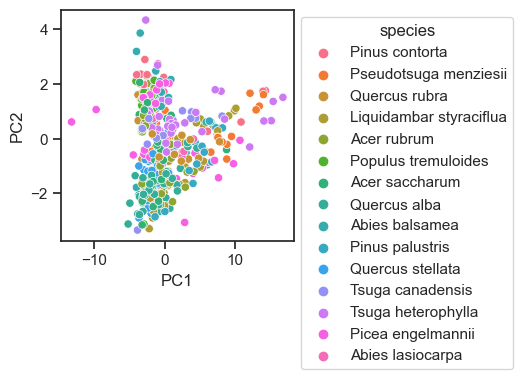

In [10]:
# We can make a PCA of the normalised values
from sklearn.decomposition import PCA
import seaborn as sns

X = t_df[masking_cols].values
X = np.nan_to_num(X)
pca = PCA(n_components=2)
min_x = X.min(axis=0)
max_x = X.max(axis=0)
mean_x = X.mean(axis=0)
std_x = X.std(axis=0)
X = (X - mean_x)/std_x
X_std = (X - min_x) / (max_x - min_x)

pca.fit(X_std)
pc_X = pca.transform(X_std)
t_df['PC1'] = pc_X[:, 0]
t_df['PC2'] = pc_X[:, 1]

ax = sns.scatterplot(data=t_df, x='PC1', y='PC2', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


# Now create a training dataset of the individual pixel values

In [11]:
# First we need to map between the satellite and the files
df = pd.read_csv(f'{data_dir}Tallo_grouped_locations_image_ids.csv')#tallo_neon_species_dedup_subsample_annotation.csv', encoding='latin-1')

sat_files = os.listdir(f'../data/harvard/neon_harvard/')

img_id_to_paths = {}
for f in sat_files:
    try:
        for s in os.listdir(f'../data/harvard/neon_harvard/{f}/PSScene/'):
            if '.tif' in s and '_3B_AnalyticMS_SR_8b_clip.tif' in s: #'20221218_230845_90_2459_3B_AnalyticMS_SR_8b_clip.tif'
                img_id = s.replace('_3B_AnalyticMS_SR_8b_clip.tif', '')
                img_id_to_paths[img_id] = f'../data/harvard/neon_harvard/{f}/PSScene/{s}'
    except:
        print(f)

sat_files = os.listdir(f'../data/tallo/planetscope/sat_data/')

for f in sat_files:
    try:
        for s in os.listdir(f'../data/tallo/planetscope/sat_data/{f}/PSScene/'):
            if '.tif' in s and '_3B_AnalyticMS_SR_8b_clip.tif' in s: #'20221218_230845_90_2459_3B_AnalyticMS_SR_8b_clip.tif'
                img_id = s.replace('_3B_AnalyticMS_SR_8b_clip.tif', '')
                img_id_to_paths[img_id] = f'../data/tallo/planetscope/sat_data/{f}/PSScene/{s}'
    except:
        print(f)
# Now add to the df
paths = []
for img_id in df['image_ids'].values:
    paths.append(img_id_to_paths.get(img_id))
df['path'] = paths
df.species.value_counts()

.DS_Store
.DS_Store
PSScene
manifest.json
4e2e792b-7180-48df-96db-f8223e028d94


species
Picea abies                249
Bursera simaruba           172
Acer rubrum                148
Quercus rubra              147
Abies balsamea             138
Pseudotsuga menziesii      123
Pinus taeda                 98
Populus tremuloides         93
Quercus alba                84
Liquidambar styraciflua     84
Acer saccharum              78
Liriodendron tulipifera     76
Robinia pseudoacacia        55
Pinus palustris             51
Fagus grandifolia           49
Pinus contorta              49
Pinus ponderosa             48
Fraxinus americana          45
Cornus drummondii           42
Tsuga canadensis            40
Quercus velutina            37
Picea glauca                36
Quercus stellata            35
Abies lasiocarpa            35
Celtis occidentalis         30
Quercus nigra               30
Pinus strobus               30
Fraxinus pennsylvanica      28
Ulmus americana             27
Betula papyrifera           27
Carpinus caroliniana        27
Carya ovata                 22


In [ ]:
training_rows = []
err = 0
# Cool! So now we want to collect the values that pass all the masking...
for image_id in set(df['image_ids'].values):
    #try:
    sub_df = df[df['image_ids'] == image_id]
    species = sub_df['species'].values[0]
    t_ids = sub_df['tree_id'].values[0]
    img_path = sub_df['path'].values[0]

    if img_path != None:
        o = Image()
        o.load_image(image_path=img_path)
        o.name = species
        # Do this for each image, and also plot any coordinates on them as well 
        # Image bands is something like below, we leave it up to the user to define i.e. could be indicies
        image_bands = []
        for band in bands: # Always normalise so that it is easier for
            normed = o.image.read(band)
            image_bands.append(normed)
        img = o.image

        nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar = get_all_planetscope(img)
        info_cols = image_bands + [nitian, ndvi, sr, tvi, gi, gndvi, pri, osavi, tcari, redge, redge2, siredge, normg, schl, schlcar]
        masks = []
        all_nan = False
        for i, col in enumerate(masking_cols):
            # Now we want to build a total mask...
            mean_v = np.nanmedian(ind_df[col].values)
            std_v = np.nanstd(ind_df[col].values)
            lower_bound = mean_v - std_v #np.min(ind_df[col].values) # - std_v #mean_v - std_v
            upper_bound = mean_v + std_v #np.max(ind_df[col].values) # + std_v #mean_v + std_v
            # Check if the mask is all 0's
                                # Check if the whole band is all NaNs 
            m = mask_values(info_cols[i], lower_bound, upper_bound)
            if not np.any(m):
                print("ALL NAN")
                all_nan = True
                break
            masks.append(m)
        if all_nan:
            break
        total_mask = masks[0]
        for mi, mask in enumerate(masks[1:]):
            total_mask += mask
        # Save the values that are over a certain amount and also then save them as training data
        positions = np.where(total_mask > 10)                
        xs, ys = rasterio.transform.xy(o.image.transform, positions[0], positions[1])
        lons = np.array(xs)
        lats = np.array(ys)
        for i in range(0, len(lons)):
            x, y = positions[0][i], positions[1][i]
            # Get the values for this point
            row = [t_id, lons[i], lats[i], species, image_id, img_path]
            try:
                row += get_features_for_xy(y, x, o)
                training_rows.append(row)
            except:
                err += 1
    break
#     except:
#         print(image_id)


--------------------------------------------------------------------------------
left edge coord:	220359.0	
bottom edge coord:	3622806.0	
right edge coord:	220962.0	
top edge coord:	3623325.0	
dataset width:	201	
dataset height:	173	
number of bands:	(1, 2, 3, 4, 5, 6, 7, 8)	
geo ref system:	EPSG:32617	
data transform
	| 3.00, 0.00, 220359.00|
| 0.00,-3.00, 3623325.00|
| 0.00, 0.00, 1.00|	
--------------------------------------------------------------------------------


/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:58: RuntimeWarning: invalid value encountered in divide
  nitian = r_edge / (r_edge + blue_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:83: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red_band) / (nir + red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:105: RuntimeWarning: invalid value encountered in divide
  sr = (nir / red_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:207: RuntimeWarning: invalid value encountered in divide
  gndvi = (nir - green_band) / (nir + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packages/remseno/indices.py:238: RuntimeWarning: invalid value encountered in divide
  pri = (greeni_band - green_band) / (greeni_band + green_band)
/Users/ariane/opt/miniconda3/envs/rhm/lib/python3.10/site-packa

In [ ]:
training_rows